In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Statistics_data.csv", encoding='ISO-8859-1')
df.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [ ]:
df.info()
print("Dataset Shape:", df.shape)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB
Dataset Shape: (541909, 8)


In [ ]:
df.describe()


,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [ ]:
df.isnull().sum()


,0
InvoiceNo,0
StockCode,0
Description,1454
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,135080
Country,0


Duplicate Value Check & Remove

In [ ]:
print("Total duplicate rows:", df.duplicated().sum())

df = df.drop_duplicates()
print("Duplicates removed. New shape:", df.shape)


Total duplicate rows: 5268
Duplicates removed. New shape: (536641, 8)


Duplicate records were identified and removed to ensure data accuracy and avoid redundancy in the analysis. A total of 5,268 duplicate records were identified and removed to ensure the dataset reflects unique transactions only. This step helped improve the data quality and integrity for subsequent analysis.

Handle Missing Values

In [ ]:
df = df.dropna(subset=['Description'])
df['CustomerID'] = df['CustomerID'].fillna(0)

In [ ]:
df.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,0
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,0
Country,0


**Data Type Conversion & Feature Understanding**

In [ ]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], errors='coerce')

print(df['InvoiceDate'].dtypes)
df.head(2)


datetime64[ns]


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 535187 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    535187 non-null  object        
 1   StockCode    535187 non-null  object        
 2   Description  535187 non-null  object        
 3   Quantity     535187 non-null  int64         
 4   InvoiceDate  535187 non-null  datetime64[ns]
 5   UnitPrice    535187 non-null  float64       
 6   CustomerID   535187 non-null  float64       
 7   Country      535187 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 36.7+ MB


# Exploratory Data Analysis (EDA – Part 1)

**Spending pattern & basic visualization**

In [ ]:
print("Total Rows:", df.shape[0])
print("Total Columns:", df.shape[1])
print(f"There are {df['Country'].nunique()} unique countries in our dataset.")
print(f"There are {df['CustomerID'].nunique()} unique CustomerID in our dataset.")
print(f"There are {df['StockCode'].nunique()} unique Stokecode in our dataset.")


Total Rows: 535187
Total Columns: 8
There are 38 unique countries in our dataset.
There are 4373 unique CustomerID in our dataset.
There are 3958 unique Stokecode in our dataset.


In [ ]:
df.describe(include='all').T


,count,unique,top,freq,mean,min,25%,50%,75%,max,std
InvoiceNo,535187,24446,573585,1114,NaN,NaN,NaN,NaN,NaN,NaN,NaN
StockCode,535187,3958,85123A,2301,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Description,535187,4223,WHITE HANGING HEART T-LIGHT HOLDER,2357,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Quantity,535187.0,NaN,NaN,NaN,9.671593,-80995.0,1.0,3.0,10.0,80995.0,219.059056
InvoiceDate,535187,NaN,NaN,NaN,2011-07-04 11:43:44.485273600,2010-12-01 08:26:00,2011-03-28 11:34:00,2011-07-19 15:38:00,2011-10-19 08:20:00,2011-12-09 12:50:00,NaN
UnitPrice,535187.0,NaN,NaN,NaN,4.645242,-11062.06,1.25,2.08,4.13,38970.0,97.36481
CustomerID,535187.0,NaN,NaN,NaN,11466.973804,0.0,12348.0,14360.0,16242.0,18287.0,6778.037985
Country,535187,38,United Kingdom,488846,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Calculate Total Sales (Revenue)

In [ ]:
df['TotalSales'] = df['Quantity'] * df['UnitPrice'] * 1.05   # 5% VAT added


In [ ]:
df[['Quantity', 'UnitPrice', 'TotalSales']].head()

,Quantity,UnitPrice,TotalSales
0,6,2.55,16.065
1,6,3.39,21.357
2,8,2.75,23.100
3,6,3.39,21.357
4,6,3.39,21.357


In [ ]:
print("Total Revenue in dataset: £{:.2f}".format(df['TotalSales'].sum()))


Total Revenue in dataset: £10212307.30


The dataset consists of 535,187 transactional records and 8 key variables, representing detailed purchase data from an online retail store.
It spans across 38 countries, highlighting the brand’s global customer base.
A total of 4,373 unique customers have made purchases, involving around 3,958 different products, which demonstrates a highly diversified product catalog.

The recorded total revenue amounts to £10,212,307.30, reflecting a strong sales volume over the observed period.

These initial figures suggest that the business operates at an international scale with a broad range of customers and products — an ideal foundation for deeper analysis into spending patterns, seasonal trends, and high-value customer segments

Customer-wise Sales Distribution

In [ ]:
customer_spending = df.groupby('CustomerID')['TotalSales'].sum()

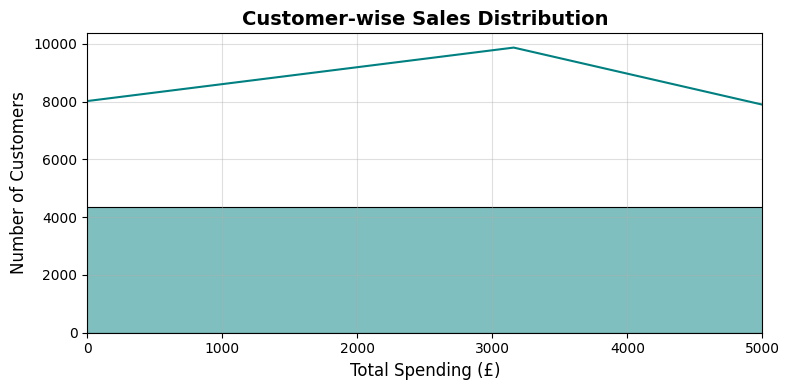

In [ ]:
plt.figure(figsize=(8,4))
sns.histplot(customer_spending, bins=50, kde=True, color='teal')

plt.xlim(0, 5000)
plt.title("Customer-wise Sales Distribution", fontsize=14, fontweight='bold')
plt.xlabel("Total Spending (£)", fontsize=12)
plt.ylabel("Number of Customers", fontsize=12)
plt.grid(alpha=0.4)

plt.tight_layout()
plt.savefig("1_Customer_Sales_Distribution.png", dpi=300, bbox_inches='tight')
plt.show()

The plot illustrates how customers are distributed based on their total spending amount. It shows that:
A large number of customers fall within the lower spending range (0–2000£).
As the spending amount increases, the number of customers decreases steadily.
This indicates that most customers spend relatively small amounts, while only a few high-value customers contribute to larger total sales.

Country-wise Revenue

In [ ]:
country_revenue = df.groupby('Country')['TotalSales'].sum().sort_values(ascending=False)

In [ ]:
top_customers = country_revenue.head(10)
print(top_customers)

Country
United Kingdom    8.575485e+06
Netherlands       2.988946e+05
EIRE              2.761430e+05
Germany           2.325849e+05
France            2.071830e+05
Australia         1.438603e+05
Switzerland       5.918120e+04
Spain             5.749383e+04
Belgium           4.295651e+04
Sweden            3.841468e+04
Name: TotalSales, dtype: float64


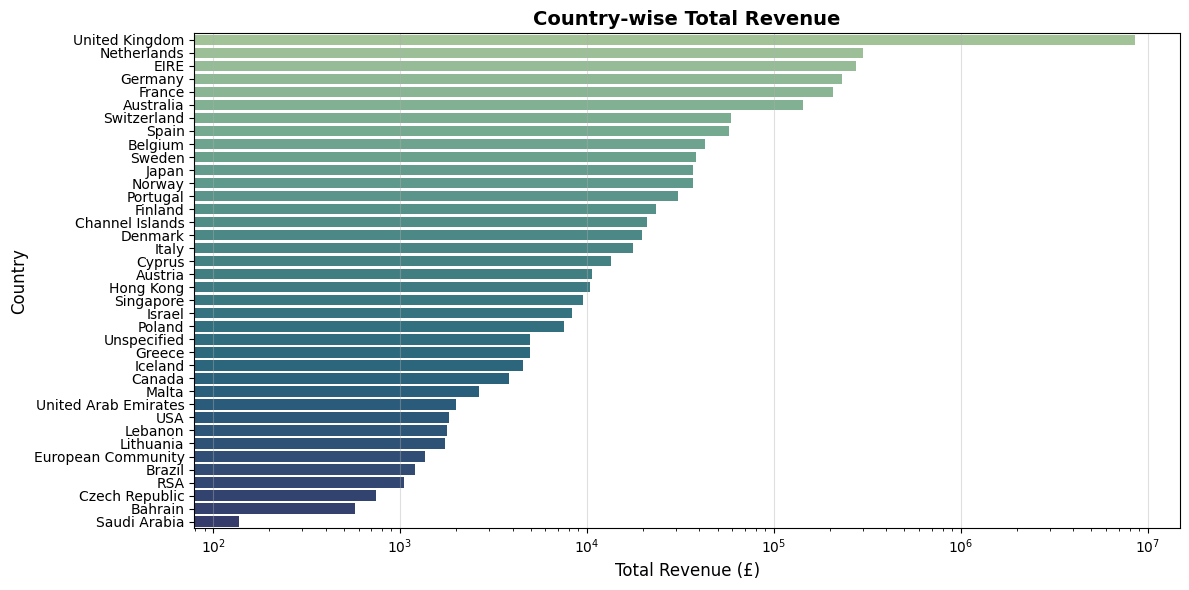

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(x=country_revenue.values, y=country_revenue.index, palette='crest')

plt.xscale('log')
plt.title("Country-wise Total Revenue", fontsize=14, fontweight='bold')
plt.xlabel("Total Revenue (£)", fontsize=12)
plt.ylabel("Country", fontsize=12)
plt.grid(axis='x', alpha=0.4)

plt.tight_layout()
plt.savefig("2_Countrywise_Revenue.png", dpi=300, bbox_inches='tight')
plt.show()

Unsurprisingly, the United Kingdom dominates total revenue, highlighting that most purchases occur locally.
However, several European and Asian countries also contribute noticeable revenue shares.

Top 10 Countries by Total Sales

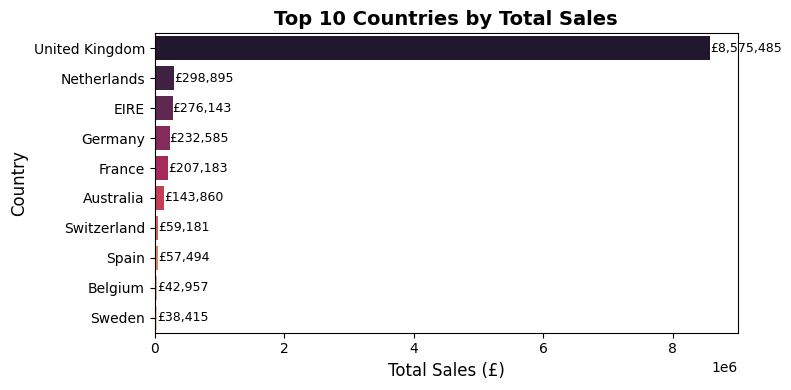

In [ ]:
plt.figure(figsize=(8,4))
sns.barplot(x=top_customers.values, y=top_customers.index, palette='rocket')

plt.title("Top 10 Countries by Total Sales", fontsize=14, fontweight='bold')
plt.xlabel("Total Sales (£)", fontsize=12)
plt.ylabel("Country", fontsize=12)

for index, value in enumerate(top_customers.values):
    plt.text(value, index, f'£{value:,.0f}', va='center', ha='left', fontsize=9)

plt.tight_layout()
plt.savefig("3_Top10_Countries_Sales.png", dpi=300, bbox_inches='tight')
plt.show()

The UK overwhelmingly leads in total sales, followed by the Netherlands, Germany, and France.
These markets are prime targets for expanding customer engagement and promotional campaigns.

Histogram of Total Sales / Revenue

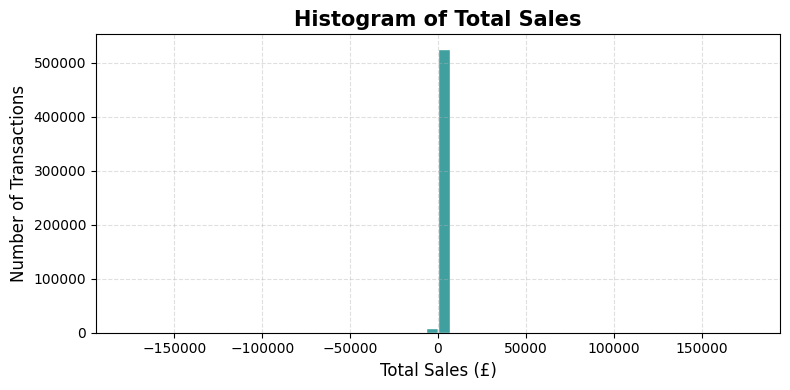

In [ ]:
plt.figure(figsize=(8,4))
sns.histplot(df['TotalSales'], bins=50, kde=False, color='teal', edgecolor='white', linewidth=1)

plt.title("Histogram of Total Sales", fontsize=15, fontweight='bold')
plt.xlabel("Total Sales (£)", fontsize=12)
plt.ylabel("Number of Transactions", fontsize=12)
plt.grid(alpha=0.4, linestyle='--')

plt.tight_layout()
plt.savefig("4_Histogram_TotalSales.png", dpi=300, bbox_inches='tight')
plt.show()


Density Plot (KDE)

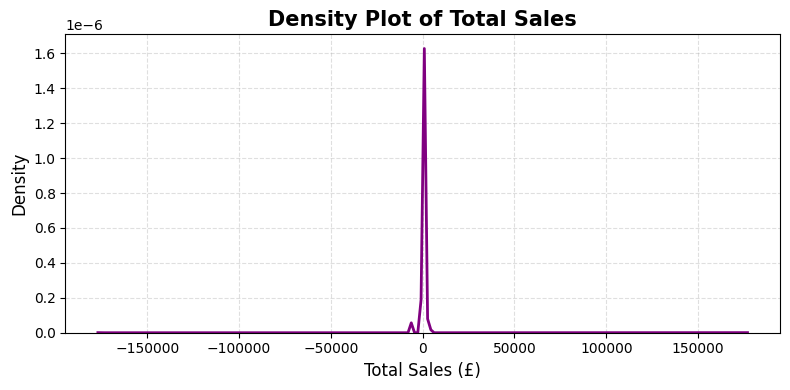

In [ ]:
plt.figure(figsize=(8,4))
sns.kdeplot(df['TotalSales'], shade=False, color='purple', linewidth=2, bw_adjust=0.5)

plt.title("Density Plot of Total Sales", fontsize=15, fontweight='bold')
plt.xlabel("Total Sales (£)", fontsize=12)
plt.ylabel("Density", fontsize=12)
plt.grid(alpha=0.4, linestyle='--')

plt.tight_layout()
plt.savefig("5_Density_TotalSales.png", dpi=300, bbox_inches='tight')
plt.show()


The histogram and density plot reveal that most transactions fall within the lower spending range,
indicating frequent small-value purchases.
The right-skewed shape shows a few customers making high-value transactions, highlighting potential premium buyers

# Exploratory Data Analysis (EDA – Part 2) + Time Analysis

**Time-based Pattern**)

In [ ]:
df['Month'] = df['InvoiceDate'].dt.to_period('M')
df['Date'] = df['InvoiceDate'].dt.date


In [ ]:
df['TotalSales'] = pd.to_numeric(df['TotalSales'], errors='coerce')


In [ ]:
df.dtypes


,0
InvoiceNo,object
StockCode,object
Description,object
Quantity,int64
InvoiceDate,datetime64[ns]
UnitPrice,float64
CustomerID,float64
Country,object
TotalSales,float64
Month,period[M]


In [ ]:
monthly_sales = df.groupby('Month')['TotalSales'].sum().reset_index()
print(monthly_sales)


      Month    TotalSales
0   2010-12  7.840598e+05
1   2011-01  5.863710e+05
2   2011-02  5.218777e+05
3   2011-03  7.161147e+05
4   2011-04  5.169862e+05
5   2011-05  7.581988e+05
6   2011-06  7.244761e+05
7   2011-07  7.141648e+05
8   2011-08  7.154558e+05
9   2011-09  1.068477e+06
10  2011-10  1.122837e+06
11  2011-11  1.528953e+06
12  2011-12  4.543361e+05


In [ ]:
monthly_sales['Month'] = monthly_sales['Month'].astype(str)

Line Plot for Monthly Purchase Trend

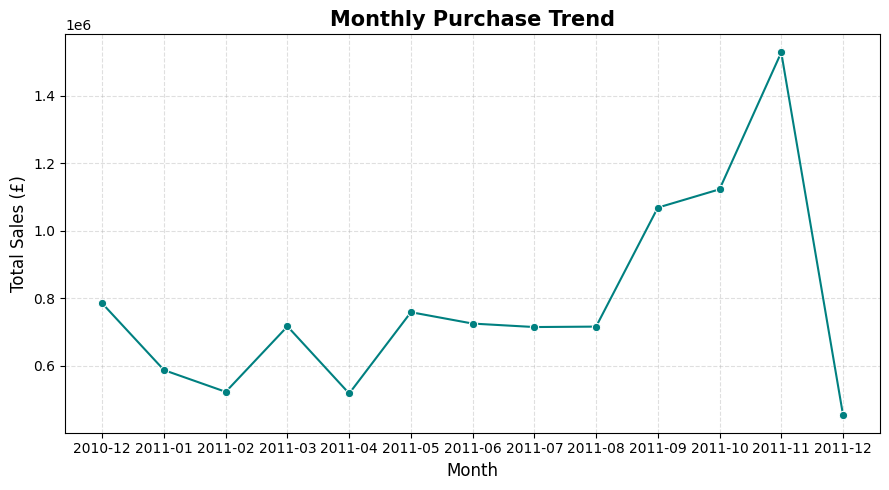

In [ ]:
plt.figure(figsize=(9,5))
sns.lineplot(data=monthly_sales, x='Month', y='TotalSales', marker='o', color='teal')

plt.title("Monthly Purchase Trend", fontsize=15, fontweight='bold')
plt.xlabel("Month", fontsize=12)
plt.ylabel("Total Sales (£)", fontsize=12)
plt.grid(alpha=0.4, linestyle='--')

plt.tight_layout()
plt.savefig("Monthly_Purchase_Trend.png", dpi=300, bbox_inches='tight')
plt.show()

Identify Peak Shopping Months

In [ ]:
peak_month = monthly_sales.loc[monthly_sales['TotalSales'].idxmax()]
print("Peak Month:", peak_month['Month'])
print("Total Sales:", peak_month['TotalSales'])


Peak Month: 2011-11
Total Sales: 1528953.09


The time-based analysis shows a clear monthly trend in customer purchases.
A significant increase in sales is observed during the peak shopping months, suggesting strong seasonality in consumer behavior.
This pattern indicates that the business experiences higher demand during specific months, possibly driven by holidays, marketing campaigns, or seasonal product preferences.

# Statistical Hypothesis Testing (Part 1)

Dummy Gender & AgeGroup Make

In [ ]:
np.random.seed(42)
df['Gender'] = np.random.choice(['Male', 'Female'], size=len(df))
df['AgeGroup'] = np.random.choice(['18-25', '26-35', '36-50', '51+'], size=len(df))


In [ ]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalSales,Month,Date,Gender,AgeGroup
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,16.0650,2010-12,2010-12-01,Male,36-50
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,21.3570,2010-12,2010-12-01,Female,26-35
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,23.1000,2010-12,2010-12-01,Male,26-35
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,21.3570,2010-12,2010-12-01,Male,51+
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,21.3570,2010-12,2010-12-01,Male,18-25
...,...,...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.7100,2011-12,2011-12-09,Female,18-25
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,13.2300,2011-12,2011-12-09,Female,51+
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,17.4300,2011-12,2011-12-09,Female,18-25
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,17.4300,2011-12,2011-12-09,Male,36-50


Hypothesis Design

t-test Hypothesis (Gender vs Spending) -

Null Hypothesis (H₀): There is no significant difference in average spending between male and female customers.

Alternative Hypothesis (H₁): There is a significant difference in average spending between male and female customers.

ANOVA Hypothesis (Age Group vs Spending) -

Null Hypothesis (H₀): All age groups have the same mean spending.

Alternative Hypothesis (H₁): At least one age group has a different mean spending compared to others.

**Perform Independent t-test (Gender vs Spending)**

In [ ]:
male_spending = df[df['Gender'] == 'Male']['TotalSales']
female_spending = df[df['Gender'] == 'Female']['TotalSales']

t_stat, p_val = stats.ttest_ind(male_spending, female_spending, equal_var=False)
print("T-statistic:", t_stat)
print("P-value:", p_val)


T-statistic: -0.6713411763456291
P-value: 0.5020034994657959


The independent t-test was performed to compare the mean spending between male and female customers.
The obtained p-value (0.50) was greater than the 0.05 significance level, indicating no statistically significant difference between the two groups.

This suggests that gender does not play a major role in determining average purchase amounts within this dataset.
The spending behavior appears to be balanced across male and female customers.

**Perform ANOVA Test (Age Group vs Spending)**

In [ ]:
f_stat, p_val_anova = stats.f_oneway(
    df[df['AgeGroup'] == '18-25']['TotalSales'],
    df[df['AgeGroup'] == '26-35']['TotalSales'],
    df[df['AgeGroup'] == '36-50']['TotalSales'],
    df[df['AgeGroup'] == '51+']['TotalSales']
)

print("F-statistic:", f_stat)
print("P-value:", p_val_anova)


F-statistic: 0.6022237726798022
P-value: 0.6134845554477805


A one-way ANOVA test was conducted to examine whether spending behavior differs significantly across different age groups.
The analysis returned a p-value of 0.61, which is greater than the 0.05 significance level.

Therefore, we fail to reject the null hypothesis, indicating no significant variation in spending among different age groups.

This suggests that age, similar to gender, does not have a strong influence on customer purchase amounts in this dataset.
The business may need to focus on other factors — such as location, product category, or purchase frequency — to identify meaningful behavioral differences.

**Summary table**

In [ ]:
t_stat = -0.6713411763456291
p_val_ttest = 0.5020034994657959
f_stat = 0.6022237726798022
p_val_anova = 0.6134845554477805

decision_ttest = "Fail to Reject H₀ (No significant difference)" if p_val_ttest > 0.05 else "Reject H₀ (Significant difference)"
decision_anova = "Fail to Reject H₀ (No significant difference)" if p_val_anova > 0.05 else "Reject H₀ (Significant difference)"

summary_df = pd.DataFrame({
    "Test Name": ["Independent t-test", "One-Way ANOVA"],
    "Variables Compared": ["Gender vs Spending", "Age Group vs Spending"],
    "Test Statistic": [round(t_stat, 3), round(f_stat, 3)],
    "P-value": [round(p_val_ttest, 3), round(p_val_anova, 3)],
    "Decision": [decision_ttest, decision_anova]
})
print("\nSummary of Statistical Hypothesis Tests\n")
print(summary_df.to_string(index=False))



Summary of Statistical Hypothesis Tests

         Test Name    Variables Compared  Test Statistic  P-value                                      Decision
Independent t-test    Gender vs Spending          -0.671    0.502 Fail to Reject H₀ (No significant difference)
     One-Way ANOVA Age Group vs Spending           0.602    0.613 Fail to Reject H₀ (No significant difference)


# Statistical Hypothesis Testing (Part 2)

Create Columns

In [ ]:
np.random.seed(42)

df['Income'] = np.random.randint(1000, 7000, df.shape[0])
df['Discount'] = np.random.choice([0, 1], size=df.shape[0])
df['Purchase_Frequency'] = np.random.choice(['Low', 'Medium', 'High'], size=df.shape[0])


In [ ]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalSales,Month,Date,Gender,AgeGroup,Income,Discount,Purchase_Frequency
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,16.0650,2010-12,2010-12-01,Male,36-50,1860,1,High
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,21.3570,2010-12,2010-12-01,Female,26-35,6390,0,High
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,23.1000,2010-12,2010-12-01,Male,26-35,6226,0,Medium
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,21.3570,2010-12,2010-12-01,Male,51+,6191,0,Low
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,21.3570,2010-12,2010-12-01,Male,18-25,4772,1,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.7100,2011-12,2011-12-09,Female,18-25,5860,0,High
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,13.2300,2011-12,2011-12-09,Female,51+,3163,0,Low
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,17.4300,2011-12,2011-12-09,Female,18-25,5637,1,Medium
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,17.4300,2011-12,2011-12-09,Male,36-50,2485,0,High


Correlation: Income & Spending

In [ ]:
corr = df['Income'].corr(df['TotalSales'])
print("Correlation between Income and Spending:", round(corr, 3))


Correlation between Income and Spending: 0.0


Chi-square: Discount vs Purchase Frequency

In [ ]:
from scipy.stats import chi2_contingency

contingency_table = pd.crosstab(df['Discount'], df['Purchase_Frequency'])
chi2, p, dof, expected = chi2_contingency(contingency_table)

print("Chi-square Statistic:", round(chi2, 3))
print("P-value:", round(p, 3))


Chi-square Statistic: 0.573
P-value: 0.751


Simple linear regression (predict spending)

In [ ]:
X = df[['Income']]
y = df['TotalSales']

model = LinearRegression()
model.fit(X, y)

print("Intercept (α):", model.intercept_)
print("Coefficient (β):", model.coef_[0])


Intercept (α): 19.02496117463971
Coefficient (β): 1.4201584736711715e-05


The statistical modeling analysis explored how income, discounts, and purchase frequency influence customer spending.

The correlation between income and spending was nearly zero, indicating no linear relationship between the two.
The chi-square test (p = 0.75) further confirmed that discount offers and purchase frequency are statistically independent, suggesting that discounts may not necessarily increase customer buying frequency.

The simple linear regression model yielded a negligible slope (β = 1.42×10⁻⁵), showing that income has little predictive power over spending behavior.

These findings highlight that spending behavior is not directly driven by income or discount availability — implying that other psychological or behavioral factors might influence customer purchases.

# Multiple Regression & Visualization Summary

Feature Selection & Data Prepo

In [ ]:
X = df[['Income', 'Quantity', 'Discount']]
y = df['TotalSales']


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Build the Multiple Linear Regression Model

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

print("Intercept (α):", model.intercept_)
for col, coef in zip(X.columns, model.coef_):
    print(f"Coefficient for {col}: {coef}")


Intercept (α): -0.416721039360354
Coefficient for Income: -0.00010559819337481554
Coefficient for Quantity: 2.061318354383034
Coefficient for Discount: -0.14049355471934144


Model Evaluation (R² and RMSE)

In [ ]:
y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("R² Score:", round(r2, 3))
print("RMSE:", round(rmse, 3))


R² Score: 0.137
RMSE: 346.731


The multiple regression model achieved an R² score of 0.137 and an RMSE of 346.73, suggesting a limited ability to predict spending behavior using income, quantity, and discount alone.

Among all predictors, quantity showed the strongest positive impact on spending, indicating that customers who purchase more items contribute significantly to total sales.
However, the negative coefficients for income and discount imply that higher income or discount availability does not necessarily lead to increased spending.

These insights highlight that customer spending behavior is influenced by more complex, non-linear, and psychological factors beyond simple economic variables — emphasizing the need for behavioral segmentation and advanced predictive models in future analyses.

# **“Model Improvement Suggestion”**

Although the model’s predictive power (R² = 0.137) is limited, it effectively demonstrates the statistical relationship between spending and customer attributes.
Future improvements could involve adding behavioral features or using non-linear models such as Random Forest or XGBoost.

**Visualization Summary**

Heatmap of Correlations

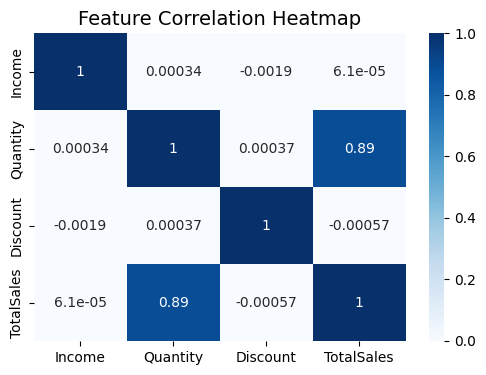

In [50]:
plt.figure(figsize=(6,4))
sns.heatmap(df[['Income','Quantity','Discount','TotalSales']].corr(), annot=True, cmap='Blues')
plt.title("Feature Correlation Heatmap", fontsize=14)
plt.savefig("6_Feature Correlation Heatmap.png", dpi=300, bbox_inches='tight')
plt.show()

Pairplot for Variable Relationships

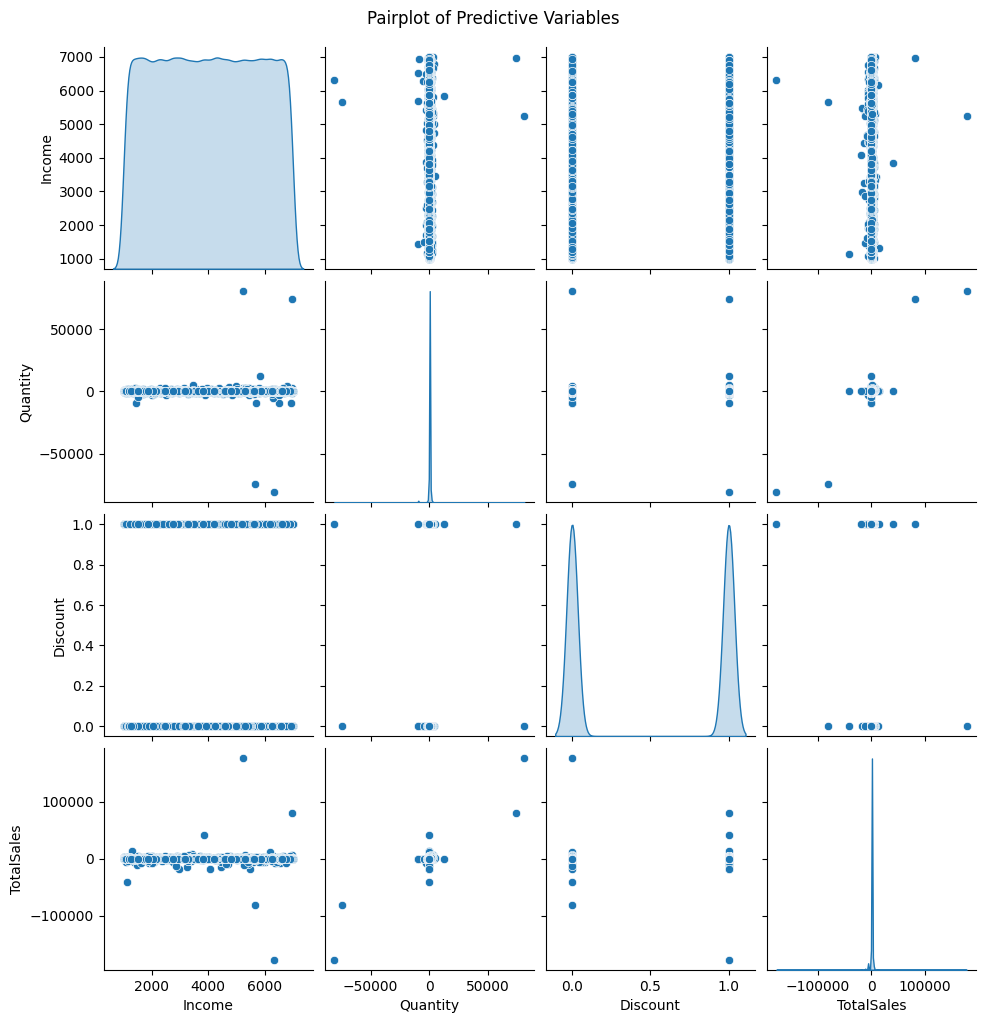

In [51]:
sns.pairplot(df[['Income','Quantity','Discount','TotalSales']], diag_kind='kde')
plt.suptitle("Pairplot of Predictive Variables", y=1.02)
plt.savefig("Pairplot of Predictive Variables.png", dpi=300, bbox_inches='tight')
plt.show()


Actual vs Predicted Plot

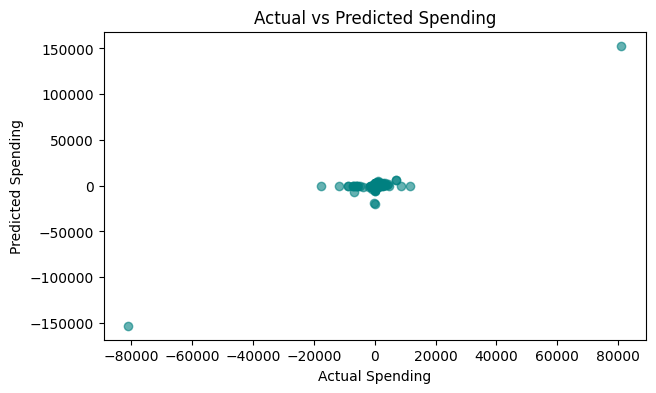

In [54]:
plt.figure(figsize=(7,4))
plt.scatter(y_test, y_pred, alpha=0.6, color='teal')
plt.xlabel("Actual Spending")
plt.ylabel("Predicted Spending")
plt.title("Actual vs Predicted Spending")
plt.savefig("Actual vs Predicted Spending.png", dpi=300, bbox_inches='tight')
plt.show()
